<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2024/blob/main/Sleep_stages_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and install libraries

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Initialization

In [6]:
t_lower_bound = 35

# Download data

In [2]:
# GitHub repository URL
repo_url = "https://github.com/kotosham/sleep-stages"

# Raw files URLs
download_files = ['1.csv', '2.csv', '3-1.csv', '3-2.csv',
                  '4.csv', '5.csv', '6.csv', '7.csv']
# files_with_subfiles = ['3']

for i in download_files:
  file_url = f"{repo_url}/raw/main/{i}"
  # Download the file
  response = requests.get(file_url)
  # Check if the request was successful
  if response.status_code == 200:
      # Save the content to a local file
      with open(i, "wb") as file:
          file.write(response.content)
  else:
      print(f"Failed to download the file. Status code: {response.status_code}")

Concatinate parts of a large file and visualize its columns

In [10]:
dfs = []
df_3_1 = pd.read_csv('3-1.csv')
dfs.append(df_3_1)
df_3_2 = pd.read_csv('3-2.csv')
dfs.append(df_3_2)
df = pd.concat(dfs, ignore_index=True)

# Replace NaN values with the mean of their respective columns
df.replace('#DIV/0!', '0.0')
df['1 T'] = df['1 T'].clip(lower=t_lower_bound)
# df_3(df_3.mean(), inplace=True)


print(df.head())

   Time,s  1 LDF   1 T  1 A365  1 A460   1 Anadh  2 LDF    2 T  2 A365  \
0    0.05   20.4  35.0   103.0    22.0  0.213592   22.3  34.39   118.0   
1    0.10   20.4  35.0   103.0    22.0  0.213592   22.3  34.39   118.0   
2    0.15   20.4  35.0   103.0    22.0  0.213592   22.3  34.39   118.0   
3    0.20   20.4  35.0   103.0    22.0  0.213592   22.3  34.39   118.0   
4    0.25   17.2  35.0   103.0    22.0  0.213592   23.3  34.39   118.0   

   2 A460   2 Anadh Sleep stages  
0    81.0  0.686441            W  
1    81.0  0.686441            W  
2    81.0  0.686441            W  
3    81.0  0.686441            W  
4    81.0  0.686441            W  


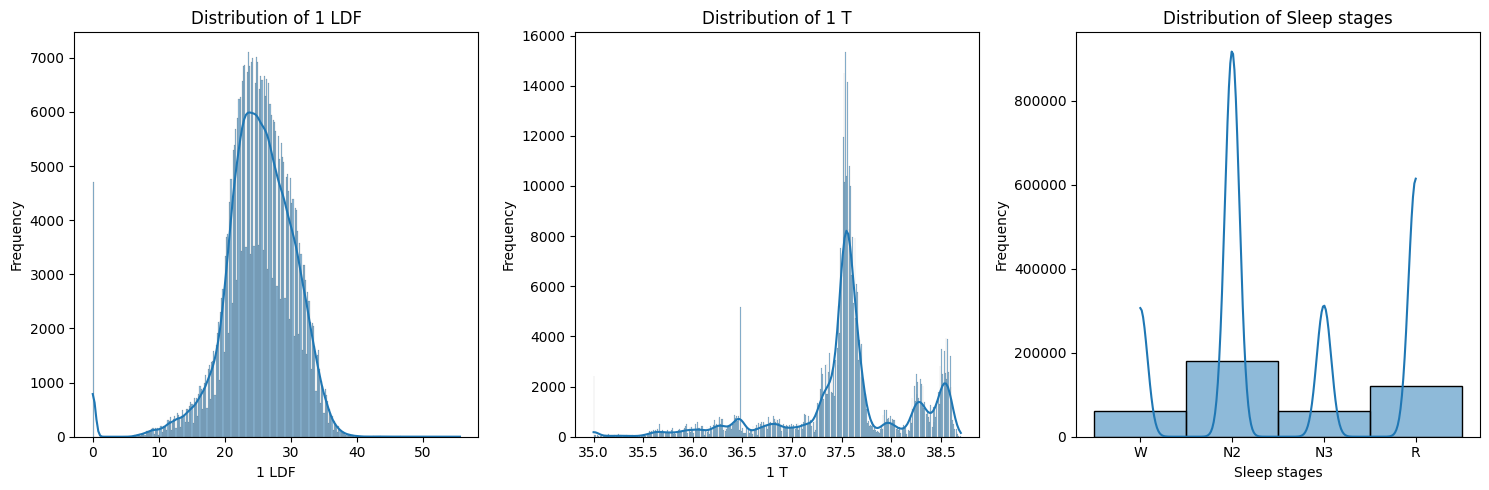

In [11]:
# Plot a column of the DataFrame using seaborn
columns_to_plot = [df.columns[1], df.columns[2], df.columns[-1]]

# Create a figure with 3 subplots in one line
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Plot the first three columns in the subplots
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

In [5]:
df['Sleep stages'][1930]

'W'